In [24]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [25]:
M = 4
in0 = 0.5 # flux into the first lake, volume/time
c = 0.01 # water loss / seepage, volume/time

In [26]:
def myfun( t, u): 
    f = np.zeros((M))
    f[0] = in0 - c*u[0]
    for i in range(1,M):
        f[i] = c*u[i-1] - c*u[i]
    return f

In [27]:
#initial conditions
u0 = np.zeros((M))

Dt = 0.1
t0 = 0
tmax = 1000
t =np.arange(t0, tmax, Dt)
N = np.shape(t)[0]

In [28]:
sol = solve_ivp(myfun, [t0, tmax], u0, method='DOP853', t_eval = t)

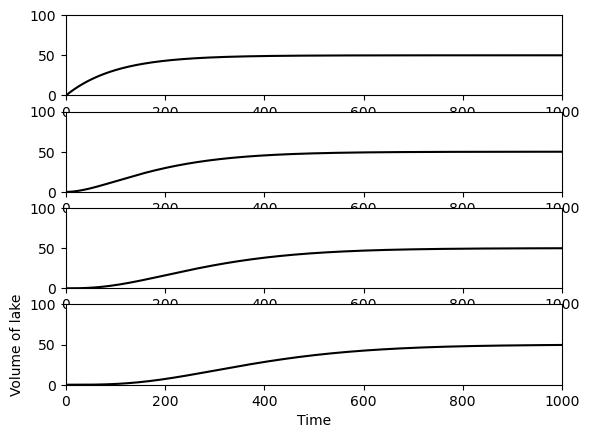

In [31]:
fig = plt.figure()
for i in range(M): 
    axi = plt.subplot(M,1,i+1)
    plt.axis( [t0,tmax,0,100])
    plt.plot(sol.t,sol.y[i],'k-')
plt.xlabel('Time');
plt.ylabel('Volume of lake');